We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [657]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-09-19 16:28:08--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.219.10, 13.227.219.109, 13.227.219.122, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [658]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [659]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-09-19   19      9  2020     47       1             Afghanistan    AF   
1 2020-09-18   18      9  2020      0       0             Afghanistan    AF   
2 2020-09-17   17      9  2020     17       0             Afghanistan    AF   
3 2020-09-16   16      9  2020     40      10             Afghanistan    AF   
4 2020-09-15   15      9  2020     99       6             Afghanistan    AF   
5 2020-09-14   14      9  2020     75       0             Afghanistan    AF   
6 2020-09-13   13      9  2020     35       0             Afghanistan    AF   
7 2020-09-12   12      9  2020     34       0             Afghanistan    AF   
8 2020-09-11   11      9  2020     28       0             Afghanistan    AF   
9 2020-09-10   10      9  2020     24       2             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           1.616645           
1                                           1.535155           
2                                           1.653446           
3                                           1.708649           
4                                           1.627159           
5                                           1.456294           
6                                           1.309088           
7                                           1.224970           
8                                           1.164510           
9                                           1.098793

Last check of our source dataframe.

In [660]:
df.count()

dateRep                                                       43718
day                                                           43718
month                                                         43718
year                                                          43718
cases                                                         43718
deaths                                                        43718
countriesAndTerritories                                       43718
geoId                                                         43718
countryterritoryCode                                          43654
popData2019                                                   43654
continentExp                                                  43718
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    40937
dtype: int64

We pivot to a country by column format.

In [661]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                              \
geoId         AD     AE    AF   AG   AI     AL     AM     AO       AR     AT   
dateRep                                                                        
2019-12-31   NaN    0.0   0.0  NaN  NaN    NaN    0.0    NaN      NaN    0.0   
2020-01-01   NaN    0.0   0.0  NaN  NaN    NaN    0.0    NaN      NaN    0.0   
2020-01-02   NaN    0.0   0.0  NaN  NaN    NaN    0.0    NaN      NaN    0.0   
2020-01-03   NaN    0.0   0.0  NaN  NaN    NaN    0.0    NaN      NaN    0.0   
2020-01-04   NaN    0.0   0.0  NaN  NaN    NaN    0.0    NaN      NaN    0.0   
...          ...    ...   ...  ...  ...    ...    ...    ...      ...    ...   
2020-09-15  94.0  777.0  99.0  0.0  0.0  167.0  107.0   53.0   9056.0  549.0   
2020-09-16   0.0  674.0  40.0  0.0  0.0  152.0  150.0   51.0   9908.0  860.0   
2020-09-17   0.0  842.0  17.0  0.0  0.0  144.0  257.0  130.0  11893.0  704.0   
2020-09-18  45.0  786.0   0.0  0.0  0.0  132.0  295.0  180.0  11674.0  922.0   
2020-09-19  81.0  865.0  47.0  0.0  0.0  125.0  239.0   40.0  12701.0  821.0   

            ... deaths                                                  
geoId       ...     VC    VE   VG   VI   VN   XK   YE     ZA   ZM   ZW  
dateRep     ...                                                         
2019-12-31  ...    NaN   NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-01  ...    NaN   NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-02  ...    NaN   NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-03  ...    NaN   NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
2020-01-04  ...    NaN   NaN  NaN  NaN  0.0  NaN  NaN    NaN  NaN  NaN  
...         ...    ...   ...  ...  ...  ...  ...  ...    ...  ...  ...  
2020-09-15  ...    0.0   9.0  0.0  0.0  0.0  4.0  0.0   52.0  8.0  0.0  
2020-09-16  ...    0.0   8.0  0.0  0.0  0.0  1.0  0.0  142.0  4.0  0.0  
2020-09-17  ...    0.0   9.0  0.0  0.0  0.0  3.0  1.0   64.0  2.0  0.0  
2020-09-18  ...    0.0  10.0  0.0  0.0  0.0  3.0  0.0   67.0  0.0  0.0  
2020-09-19  ...    0.0   9.0  0.0  0.0  0.0  4.0  1.0   85.0  3.0  0.0  

[264 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [662]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-09-15   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-09-16   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-09-17   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-09-18   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-09-19   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-09-15 NaN  NaN NaN NaN NaN NaN NaN  
2021-09-16 NaN  NaN NaN NaN NaN NaN NaN  
2021-09-17 NaN  NaN NaN NaN NaN NaN NaN  
2021-09-18 NaN  NaN NaN NaN NaN NaN NaN  
2021-09-19 NaN  NaN NaN NaN NaN NaN NaN  

[629 rows x 420 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [663]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    629.00000
mean     314.00000
std      181.72094
min        0.00000
25%      157.00000
50%      314.00000
75%      471.00000
max      628.00000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [664]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [665]:
country  = 'KE'
measure  = 'cases'
smeasure = 'scases' # smoothed
rmeasure = 'rcases' # remaining
pmeasure = 'pcases' # predicted
wmeasure = 'wcases' # waves

wave = -1

df_geo[(pmeasure, country)] = 0
df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
df_geo[(rmeasure, country)] = df_geo[smeasure][country]

plotlist = [(smeasure, country), (pmeasure, country)]

To ignore early outbreaks and long tails, we define the minimum case count as one in million.

In [666]:
popdata = df[df['geoId'] == country]['popData2019'].iloc[0]
#mincases = popdata / 1e6
#mincases = 100
mincases = max(popdata / 1e6, 2)
print('Minimum number of cases is {:1.0f}'.format(mincases))

Minimum number of cases is 53


# Iterate here

In [667]:
wave += 1
curwave = wmeasure + str(wave)
df_geo[(curwave, country)] = 0
plotlist += [(curwave, country)]

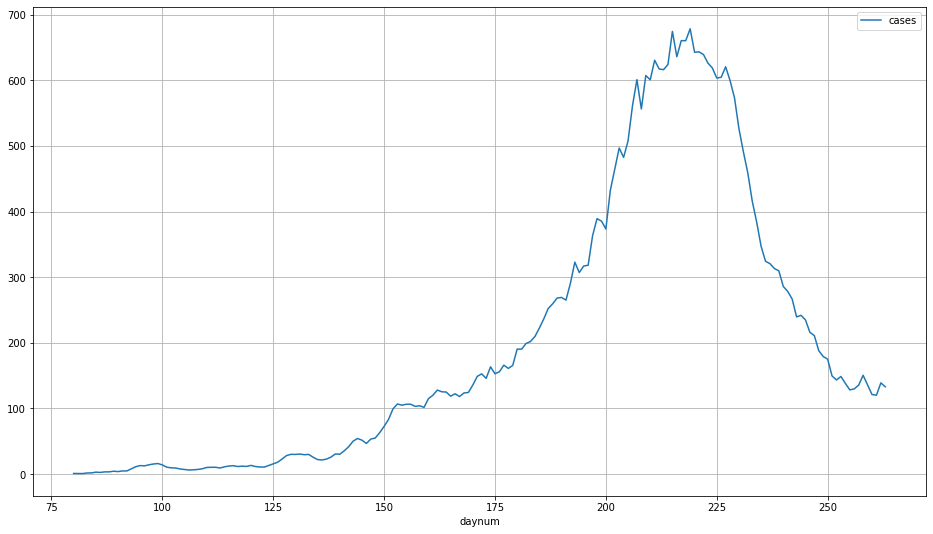

In [668]:
df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                        measure:df_geo[rmeasure][country]})
df_pred[df_pred[measure].notnull()].plot(x='daynum', y=measure, figsize=(16, 9), grid=True)

The `cumul`column gets the cumulative cases. Using these, we divide the current by the cumulative cases. According to Gumbel this should have a logarithmic form, so using a logarithmic scale it should approach linearity.

To prevent errors we only use values above 0 and take the logarithm. Then we cut off the range to remove noise at the beginning and end of the curve and filter out days with number of cases below the minimum.

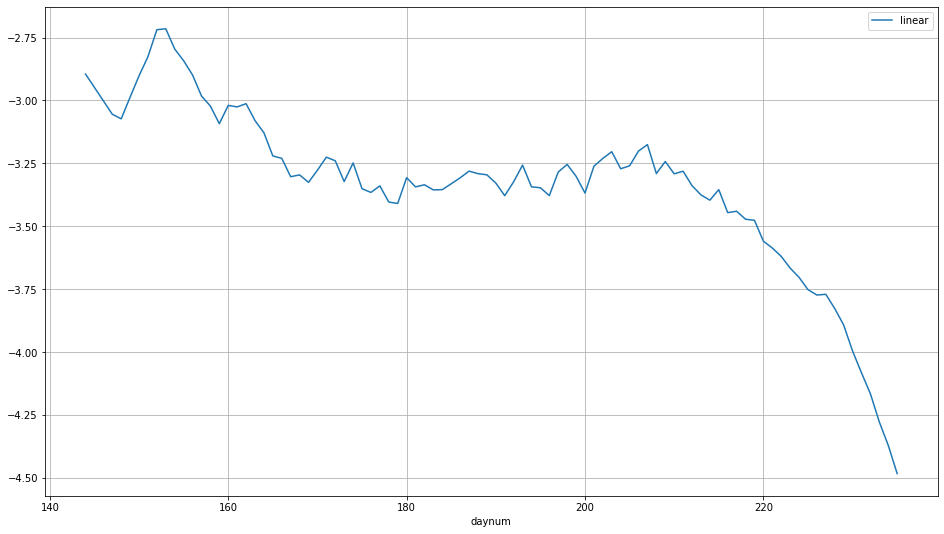

In [669]:
df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

df_pred['linear'] = np.log(df_pred['gumdiv'])

df_pred = df_pred[(df_pred['linear'] < -0.5) &
                  (df_pred['linear'] > -4.5)]

df_pred.plot(x='daynum', y='linear', figsize=(16, 9), grid=True)

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.109719  1      0.112  0.000  0.000  
1     0       0    75    0.013131  3      0.014  0.880  0.875  
2     0       0    27    0.008154  5      0.009  0.926  0.919  
3     0       0    63    0.005713  7      0.007  0.948  0.940  
4     0       0    7     0.003409  9      0.004  0.969  0.962  
5     0       0    83    0.002613  11     0.003  0.976  0.970  
6     0       0    1     0.002153  13     0.003  0.980  0.974  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   13     0.00  0.003  0.980  0.974  
1     9   12     0.00  0.003  0.980

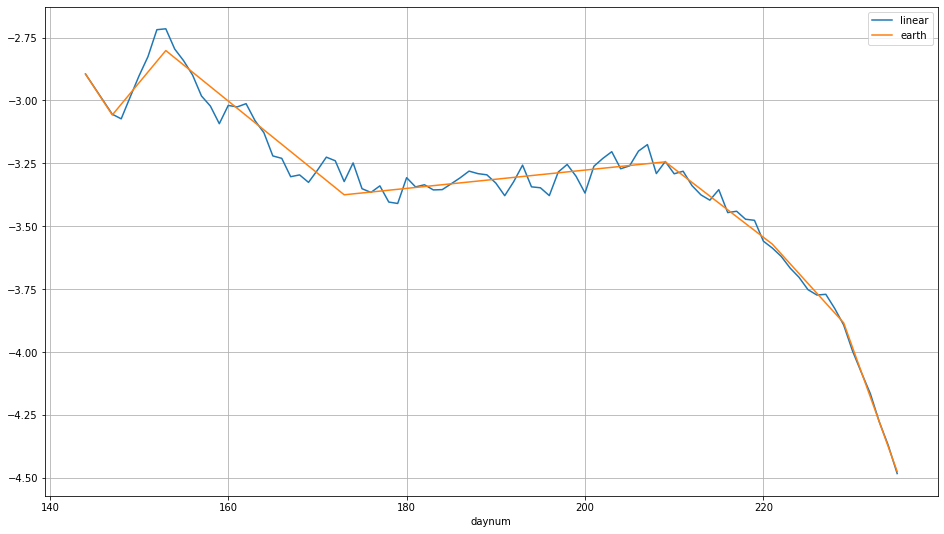

In [670]:
from pyearth import Earth

X = df_pred['daynum'].values.reshape(-1, 1)
y = df_pred['linear'].values.reshape(-1, 1)

#model = Earth()
#model = Earth(minspan=0)
model = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
model.fit(X, y)

print(model.trace())
print(model.summary())

df_pred['earth'] = model.predict(X)

daymin = df_pred['daynum'].min()
daymax = df_pred['daynum'].max()
print('From {} to {}'.format(daymin, daymax))

df_pred.plot(x='daynum', y=['linear', 'earth'], figsize=(16, 9), grid=True)

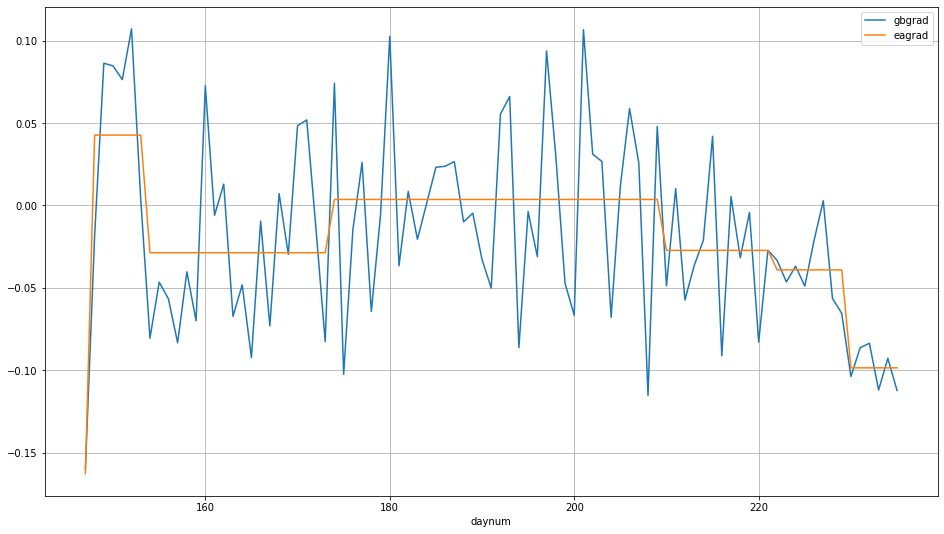

In [671]:
#df_pred['gbgrad'] = np.gradient(df_pred['linear'])
#df_pred['eagrad'] = np.gradient(df_pred['earth'])

df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

#df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
#df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

df_pred.plot(x='daynum', y=['gbgrad', 'eagrad'], figsize=(16, 9), grid=True)

In [672]:
from pyearth import export
fitmod = export.export_python_function(model)
print(export.export_python_string(model))

def model(example_iterator):
    accessors = [lambda x: 1.0670855376216672,
		lambda x: -0.011853410640039919 * max(0, x[0] - 221.0),
		lambda x: -0.08672440755595863 * max(0, x[0] - 173.0),
		lambda x: 0.11904755975335586 * max(0, 173.0 - x[0]),
		lambda x: -0.030903729884557248 * max(0, 209.0 - x[0]),
		lambda x: -0.07138418638431204 * max(0, 153.0 - x[0]),
		lambda x: -0.059460608905101124 * max(0, 229.0 - x[0]),
		lambda x: 0.09694929849199212 * max(0, 147.0 - x[0])]
    for x in example_iterator:
        yield sum(accessor(x) for accessor in accessors)
    


In [673]:
df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                   (df_pred['daynum'] == (daymin + 1)) |
                   (df_pred['daynum'] == daymax))
df_pred['daycount'] = df_pred.reset_index().index
df_pred[df_pred['knot']]

daynum       cases    gumdiv    linear     earth    gbgrad  \
2020-05-27     148   55.000000  0.046274 -3.073174 -3.015083 -0.018391   
2020-06-02     154  105.000000  0.061077 -2.795621 -2.830262 -0.080554   
2020-06-22     174  163.428571  0.038834 -3.248469 -3.371603  0.074141   
2020-07-28     210  600.571429  0.037189 -3.291741 -3.271469 -0.048781   
2020-08-09     222  639.142857  0.026776 -3.620262 -3.610488 -0.033380   
2020-08-17     230  526.285714  0.018375 -3.996790 -3.982886 -0.103836   
2020-08-22     235  347.000000  0.011289 -4.483949 -4.475775 -0.112299   

              eagrad  knot  daycount  
2020-05-27  0.042701  True         2  
2020-06-02 -0.028683  True         8  
2020-06-22  0.003640  True        28  
2020-07-28 -0.027264  True        64  
2020-08-09 -0.039117  True        76  
2020-08-17 -0.098578  True        84  
2020-08-22 -0.098578  True        89

In [674]:
df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

#df_knot['eadiff'] = df_knot['eagrad'] - df_knot['eagrad'].shift(1)
#df_knot['eamax'] = np.maximum.accumulate(df_knot['eagrad'])

df_knot

daynum  daycount    eagrad  daysdata  daystime
2020-05-27     148         2  0.042701       6.0       6.0
2020-06-02     154         8 -0.028683      20.0      20.0
2020-06-22     174        28  0.003640      36.0      36.0
2020-07-28     210        64 -0.027264      12.0      12.0
2020-08-09     222        76 -0.039117       8.0       8.0
2020-08-17     230        84 -0.098578       5.0       5.0
2020-08-22     235        89 -0.098578       NaN       NaN

In [675]:
df_knot['cand'] = ((df_knot['daysdata'] >= 3) &
                   (df_knot['eagrad'] < -1/30))# &
#                   (df_knot['daysdata'] == df_knot['daystime']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand
2020-05-27     148         2  0.042701       6.0       6.0  False
2020-06-02     154         8 -0.028683      20.0      20.0  False
2020-06-22     174        28  0.003640      36.0      36.0  False
2020-07-28     210        64 -0.027264      12.0      12.0  False
2020-08-09     222        76 -0.039117       8.0       8.0   True
2020-08-17     230        84 -0.098578       5.0       5.0   True
2020-08-22     235        89 -0.098578       NaN       NaN  False

In [676]:
df_knot['since'] = df_knot['daynum'] - daymin
#df_knot['score'] = - df_knot['eagrad']
#df_knot['score'] = - df_knot['eagrad'] / df_knot['since']
#df_knot['score'] = (df_knot['eagrad'] ** 2) / np.sqrt(df_knot['since'])
#df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-05-27     148         2  0.042701       6.0       6.0  False      4   
2020-06-02     154         8 -0.028683      20.0      20.0  False     10   
2020-06-22     174        28  0.003640      36.0      36.0  False     30   
2020-07-28     210        64 -0.027264      12.0      12.0  False     66   
2020-08-09     222        76 -0.039117       8.0       8.0   True     78   
2020-08-17     230        84 -0.098578       5.0       5.0   True     86   
2020-08-22     235        89 -0.098578       NaN       NaN  False     91   

               score  
2020-05-27  0.002735  
2020-06-02  0.001645  
2020-06-22  0.000016  
2020-07-28  0.000135  
2020-08-09  0.000157  
2020-08-17  0.000565  
2020-08-22       NaN

In [677]:
df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()
df_knot

daynum  daycount    eagrad  daysdata  daystime   cand  since  \
2020-05-27     148         2  0.042701       6.0       6.0  False      4   
2020-06-02     154         8 -0.028683      20.0      20.0  False     10   
2020-06-22     174        28  0.003640      36.0      36.0  False     30   
2020-07-28     210        64 -0.027264      12.0      12.0  False     66   
2020-08-09     222        76 -0.039117       8.0       8.0   True     78   
2020-08-17     230        84 -0.098578       5.0       5.0   True     86   
2020-08-22     235        89 -0.098578       NaN       NaN  False     91   

               score  choice  
2020-05-27  0.002735   False  
2020-06-02  0.001645   False  
2020-06-22  0.000016   False  
2020-07-28  0.000135   False  
2020-08-09  0.000157   False  
2020-08-17  0.000565    True  
2020-08-22       NaN   False

In [678]:
choice = df_knot[df_knot['choice']]
lower = choice['daynum'].values[0]
upper = choice['daysdata'].values[0] + lower
print('From {} to {}'.format(lower, upper))

From 230 to 235.0


From slope and intercept of this line we can calculate beta and mu of the corresponding Gumbel distribution. Because the resulting CDF always ends at 1, we need to scale back to the original data dividing the number of cases in the dataset by the sum of the Gumbel PDF for the same days.

In [679]:
#lower = 185
#upper = 187

df_pred = df_pred[(df_pred['daynum'] >= lower) &
                  (df_pred['daynum'] <= upper)].copy()

slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
intercept = fitmod([[lower]])[0] - (lower * slope)

print('From {} to {} with slope {:1.4f} and intercept {:1.3f}'.format(
    lower, upper, slope, intercept))

beta = - 1 / slope
mu = beta * (intercept + np.log(beta))

df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

#final = np.exp(np.log(df_pred['scale']).mean())
final = df_pred['scale'].mean()

print('Gumbel beta {:1.3f} with mu {:1.0f} for {:1.0f}'.format(beta, mu, final))

From 230 to 235.0 with slope -0.0986 and intercept 18.690
Gumbel beta 10.144 with mu 213 for 34520


In [680]:
df_pred

daynum       cases    gumdiv    linear     earth    gbgrad  \
2020-08-17     230  526.285714  0.018375 -3.996790 -3.982886 -0.103836   
2020-08-18     231  491.000000  0.016854 -4.083188 -4.081464 -0.086397   
2020-08-19     232  458.714286  0.015501 -4.166827 -4.180042 -0.083639   
2020-08-20     233  415.857143  0.013858 -4.278868 -4.278620 -0.112041   
2020-08-21     234  383.857143  0.012630 -4.371650 -4.377198 -0.092782   
2020-08-22     235  347.000000  0.011289 -4.483949 -4.475775 -0.112299   

              eagrad   knot  daycount     pgumb         scale  
2020-08-17 -0.098578   True        84  0.015423  34123.325940  
2020-08-18 -0.098578  False        85  0.014225  34515.759046  
2020-08-19 -0.098578  False        86  0.013099  35019.321786  
2020-08-20 -0.098578  False        87  0.012043  34529.844250  
2020-08-21 -0.098578  False        88  0.011058  34713.547466  
2020-08-22 -0.098578   True        89  0.010140  34219.679429

Finished fitting, now back to the original data! We apply the Gumbel PDF to the original day numbers and scale by the current cases as part of the total.

In [681]:
df_geo[(curwave, country)] = gumpdf(df_geo['daynum'], beta, mu) * final
df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
df_geo[plotlist].loc['20200101':'20210101'].plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

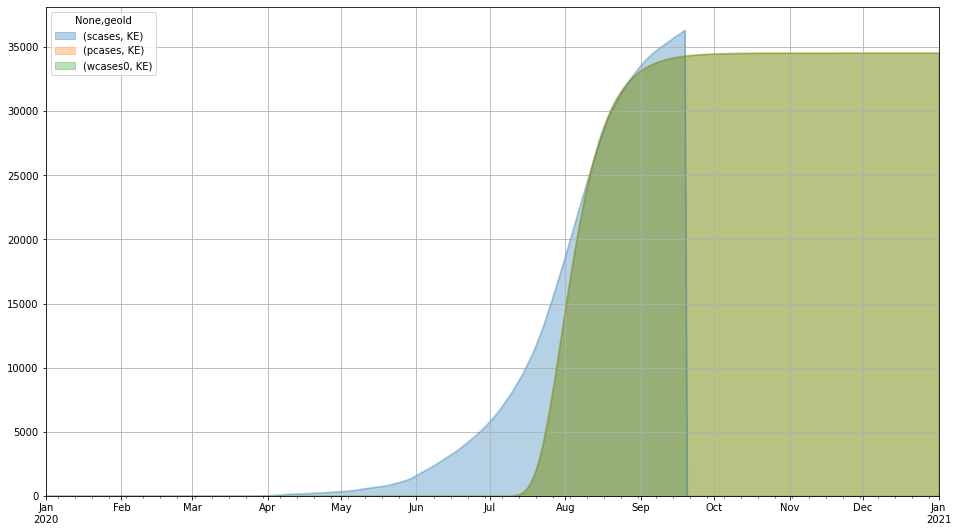

In [682]:
df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
    figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3)

We have the estimate for the final number of cases, so the progress would be the current number of cases divided by the final number. This could end up over 100%, if we estimate that the current wave of the outbreak is over and new cases are due to relaxing of measures, increase in testing or other factors.

In [683]:
progress = df_geo[measure][country].sum() / df_geo[pmeasure][country].sum()
print('Currently at {:1.2f}% of {:1.0f}'.format(progress * 100, df_geo[pmeasure][country].sum()))

Currently at 106.38% of 34520


The peak can be found at the first predicted value that is larger than the next.

In [684]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-07-31


This date should closely match the `mu` of our distribution, in days since the start of the index.

In [685]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-07-31


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [686]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-09-12


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [687]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
               (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-07-14


We define the maximum delta as the day in the curve with the sharpest rise.

In [688]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 103 on 2020-07-22


This should match the maximum gradient of the daily data.

In [689]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 103


Back to the original curve, showing the number of infected concurrently.

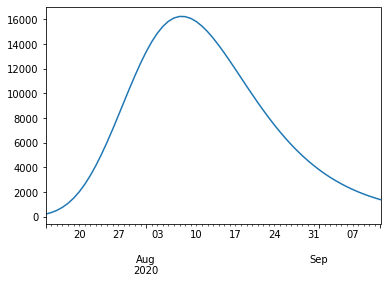

In [690]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [691]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 16243


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

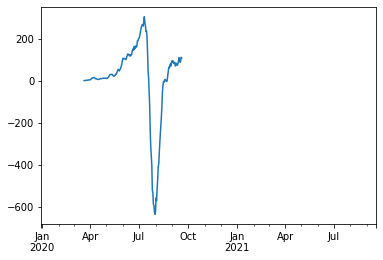

In [692]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[:].plot()

In [693]:
df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]

Keep exploring! Stay home, wash your hands, keep your distance.